In [27]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


Let A be a matrix of dimensions (n,k) and B be a matrix with dimensions (k,m). The matrix multiplication of A and B is C with dimensions (n,m).

An element $C_{ij}$ of C is the sum of the products of each element of the ith row of A with and the corresponding element on the jth column of B.

For an element $C_{ij}$ , k multiplications are made one for each element of the ith row of A and corressponding element of column j of B.

There are n$\times$m elements in total in the matrix C. So total number of multiplications made is equal to k$\times$n$\times$m.

For an element $C_{ij}$, (k-1) additions are made. This is because there are k multiplications and to combine them (k-1) additions are made.

There are n$\times$m elements in total in the matrix C. So total number of additions made is equal to (k-1)$\times$n$\times$m.

### Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [4]:
A= [[8, 12, 9, 5, 1],
    [4, 27, 3, 16, 2],
    [1, 35, 8, 3, 9],
    [6, 22, 4, 7, 5],
    [3, 19, 1, 2, 8],
    [7, 14, 5, 9, 3],
    [2, 11, 3, 1, 4]]

B= [[15, 3, 8, 21, 4, 7, 12, 1, 6],
    [9, 14, 2, 5, 19, 11, 8, 10, 17],
    [20, 3, 6, 13, 24, 2, 9, 15, 18],
    [7, 22, 5, 12, 1, 16, 14, 4, 3],
    [11, 8, 19, 2, 13, 25, 6, 10, 17]]


#by list of lists
def bylist(A,B):
    n=len(A)
    k=len(A[0])
    m=len(B)
    C= [[0 for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            for b in range(k):
                C[i][j] += A[i][b] * B[b][j]
    return C

start1 = time.perf_counter()
for i in range(10000):  
    result1 = bylist(A, B)
final1 = time.perf_counter() - start1

print("Time taken for list-based multiplication:", final1)

#by numpy matrix multiplication
A_np = np.array(A)
B_np = np.array(B)

start2 = time.perf_counter()
for i in range(10000): 
    result2 = np.dot(A_np, B_np)
final2 = time.perf_counter() - start2

print("Time taken for numpy multiplication:", final2)

Time taken for list-based multiplication: 0.5622137999162078
Time taken for numpy multiplication: 0.04787829995620996


Matrix multiplication with numpy is faster than using list of lists. This is because

1. Numpy uses highly optimized libraries (implementations in C) like BLAS (Basic Linear Algebra Subprograms) and LAPACK. These libraries uses multithreading and SIMD (Single Instruction, Multiple Data) instructions (which are low level optimizations) to speed up the matrix computations compared to python's list of lists.

2. In numpy operations are vectorized. Operations are made on the entire array at once whereas in python operations are made by element by element. This avoids looping and hence it is faster.

3. In numpy arrays are stored in a contiguous block manner which makes it easy to
access whereas in python data is stored in fragmented manner and is slower to access.

4. In python list of lists each element is a separate object whereas in numpy, arrays are homogeneously typed  and allows faster computations.

### Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?


The time complexity in the above method where we repeatedly find the highest number:

For finding the first highest element in the array, we need to pass through the array which has time complexity O(n). For second highest, we need to pass through the array again whose time complexity is also O(n).

To find the median in the worst case scenario, we need to extract half of the elements.

To find the kth highest element by removing the maximum element in each of k iterations require O(n) in each iteration. So the total time complexity is O(kn).

In the worst case to find the median, k=n/2. Therefore, total time complexity is O(n$\times$(n/2)) which is O(n2).

A better method for finding the median is the Quickselect algorithm, which has an average time complexity of O(n). 
It works by selecting a "pivot" element from the array and them partitioning the elements around it on whether it is greater than or less than pivot. On average, this partitioning step divides the array into two roughly equal halves, and each recursive step works with about half of the remaining elements. And each partitioning takes O(n) time nd there are O(logn) levels on average, the overall average time complexity is linear, 
and is O(logn)O(n) which  simplifies to O(n).


In [32]:

arr1 = np.random.randint(0, 10000, 10000)

#Using iteration method
def method1(arr):
    def kth_highest(arr, k):
        arr_copy = arr.copy()  
        for _ in range(k):
            max_i = 0
            maximum = arr_copy[0]
            for i in range(1, len(arr_copy)):
                if arr_copy[i] > maximum:
                    max_i = i
                    maximum = arr_copy[i]
            arr_copy[max_i], arr_copy[-1] = arr_copy[-1], arr_copy[max_i]
            kth_high = arr_copy.pop()
        return kth_high

    n = len(arr)
    if n % 2 == 1:  
        k = n // 2 + 1
        result = kth_highest(arr, k)
        return result
    else:  
        mid1 = kth_highest(arr, n // 2)
        mid2 = kth_highest(arr, n // 2 + 1)
        result = (mid1 + mid2) / 2
        return result

start1 = time.time()
result1 = method1(list(arr1))
final1 = time.time() - start1
print(result1)
print("Time taken by iterating method:", final1)



# using quickselect
def method2(arr):
    def quickselect(l, r, k):
        pivot, p = arr[r], l
        for i in range(l, r):
            if arr[i] <= pivot:
                arr[p], arr[i] = arr[i], arr[p]
                p += 1
        arr[p], arr[r] = arr[r], arr[p]
        
        if p > k:
            return quickselect(l, p - 1, k)
        elif p < k:
            return quickselect(p + 1, r, k)
        else:
            return arr[p]
    
    n = len(arr)
    if n % 2 == 1:  
        k = n // 2
        result = quickselect(0, n - 1, k)
        return result
    else:  
        mid1 = quickselect(0, n - 1, n // 2 - 1)
        mid2 = quickselect(0, n - 1, n // 2)
        result = (mid1 + mid2) / 2
        return result  

# Example array

start2 = time.time()
result2 = method2(list(arr1))
final2 = time.time() - start2
print(result2)
print("Time taken by quickselect method:", final2)

  
#Using numpy
start3 = time.time()
result3 = np.median(arr1)
final3 = time.time() - start3
print(result3)
print("Time taken by numpy method:", final3)

 

4938.0
Time taken by iterating method: 5.968103408813477
4938.0
Time taken by quickselect method: 0.04572010040283203
4938.0
Time taken by numpy method: 0.006117105484008789


### What is the gradient of the following function with respect to x and y?


The gradient of a function in x, y is the vector of its partial derivatives with respect to x and y.

f = ($x^{2}$)y + ($y^{3}$)sin(x)

f'(x) = 2xy + ($y^{3}$)cos(x)

f'(y) = $x^{2}$ + 3($y^{2}$)sin(x)

gradient = (f'(x), f'(y)) = (2xy + ($y^{3}$)cos(x), $x^{2}$ + 3($y^{2}$)sin(x))

### Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [8]:
import jax
import jax.numpy as jnp
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

#by JAX
gradient_f = jax.grad(f, (0, 1))

#by analytical method
def anal_grad(x,y):
    gradient_x = 2*x*y + y**3 * jnp.cos(x)
    gradient_y = x**2 + 3*y**2 * jnp.sin(x)
    return gradient_x, gradient_y

xy_values = [
    (1.5, 2.7),
    (0.8, 0.6),
    (-1.0, 4.0),
    (0.0, 0.5),
    (9.5, -4.5)
]

for x,y in xy_values:
    grad_jax = gradient_f(x,y)
    grad_anal = anal_grad(x,y)

    print(f"x: {x}, y: {y}")
    print(f"JAX Gradient: {grad_jax}")
    print(f"Analytical Gradient: {grad_anal}")
    print(f"Difference: ({grad_jax[0] - grad_anal[0]}, {grad_jax[1] - grad_anal[1]})\n")



x: 1.5, y: 2.7
JAX Gradient: (Array(9.492321, dtype=float32, weak_type=True), Array(24.065216, dtype=float32, weak_type=True))
Analytical Gradient: (Array(9.492321, dtype=float32, weak_type=True), Array(24.065216, dtype=float32, weak_type=True))
Difference: (0.0, 0.0)

x: 0.8, y: 0.6
JAX Gradient: (Array(1.1104887, dtype=float32, weak_type=True), Array(1.4147446, dtype=float32, weak_type=True))
Analytical Gradient: (Array(1.1104887, dtype=float32, weak_type=True), Array(1.4147446, dtype=float32, weak_type=True))
Difference: (0.0, 0.0)

x: -1.0, y: 4.0
JAX Gradient: (Array(26.579346, dtype=float32, weak_type=True), Array(-39.390606, dtype=float32, weak_type=True))
Analytical Gradient: (Array(26.579346, dtype=float32, weak_type=True), Array(-39.390606, dtype=float32, weak_type=True))
Difference: (0.0, 0.0)

x: 0.0, y: 0.5
JAX Gradient: (Array(0.125, dtype=float32, weak_type=True), Array(0., dtype=float32, weak_type=True))
Analytical Gradient: (Array(0.125, dtype=float32, weak_type=True),

### Use sympy to confirm that you obtain the same gradient analytically.

In [9]:
import sympy as sp
import numpy as np

# Define symbolic variables
x_sym, y_sym = sp.symbols('x y')

# Define the function
func = x_sym**2 * y_sym + y_sym**3 * sp.sin(x_sym)

# Calculate the symbolic gradients
grad_x_sym = sp.diff(func, x_sym)
grad_y_sym = sp.diff(func, y_sym)

# Define the analytical gradient function
def anal_grad(x_val, y_val):
    gradient_x = 2 * x_val * y_val + y_val**3 * np.cos(x_val)
    gradient_y = x_val**2 + 3 * y_val**2 * np.sin(x_val)
    return gradient_x, gradient_y

# List of (x, y) values to evaluate
xy_values = [
    (1.5, 2.7),
    (0.8, 0.6),
    (-1.0, 4.0),
    (0.0, 0.5),
    (9.5, -4.5)
]
# Evaluate the gradients
for x_val, y_val in xy_values:
    # Analytical gradient
    analytical_grad_val = anal_grad(x_val, y_val)
    
    # SymPy gradient
    sp_grad_x = grad_x_sym.evalf(subs={x_sym: x_val, y_sym: y_val})
    sp_grad_y = grad_y_sym.evalf(subs={x_sym: x_val, y_sym: y_val})
    
    # Print the results
    print(f"x: {x_val}, y: {y_val}")
    print(f"Analytical Gradient: {analytical_grad_val}")
    print(f"SymPy Gradient: ({sp_grad_x}, {sp_grad_y})")
    print("\n")

x: 1.5, y: 2.7
Analytical Gradient: (np.float64(9.492320340425398), np.float64(24.065215357030674))
SymPy Gradient: (9.49232034042540, 24.0652153570307)


x: 0.8, y: 0.6
Analytical Gradient: (np.float64(1.1104886492189876), np.float64(1.4147445781714847))
SymPy Gradient: (1.11048864921899, 1.41474457817148)


x: -1.0, y: 4.0
Analytical Gradient: (np.float64(26.579347575560945), np.float64(-39.39060727077903))
SymPy Gradient: (26.5793475755609, -39.3906072707790)


x: 0.0, y: 0.5
Analytical Gradient: (np.float64(0.125), np.float64(0.0))
SymPy Gradient: (0.125000000000000, 0)


x: 9.5, y: -4.5
Analytical Gradient: (np.float64(5.367312733394982), np.float64(85.68456943194508))
SymPy Gradient: (5.36731273339499, 85.6845694319451)




### Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. 

In [10]:
data = {
    2022: {
        'Branch 1': {
            1: {'Name': 'Jeev', 'Marks': {'Maths': 90, 'English': 80}},
            2: {'Name': 'Dave', 'Marks': {'Maths': 95, 'English': 85}}
        }
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'Priya', 'Marks': {'Maths': 88, 'English': 92}},
            2: {'Name': 'Fanaa', 'Marks': {'Maths': 76, 'English': 84}}
        },
        'Branch 2': {
            1: {'Name': 'Gina', 'Marks': {'Maths': 91, 'English': 87}},
            2: {'Name': 'Hanna', 'Marks': {'Maths': 79, 'English': 85}}
        }
    },
    2024: {
        'Branch 1': {
            1: {'Name': 'Indhu', 'Marks': {'Maths': 82, 'English': 88}},
            2: {'Name': 'Janvi', 'Marks': {'Maths': 77, 'English': 81}}
        },
        'Branch 2': {
            1: {'Name': 'Katherine', 'Marks': {'Maths': 94, 'English': 93}},
            2: {'Name': 'Luv', 'Marks': {'Maths': 89, 'English': 90}}
        }
    },
    2025: {
        'Branch 1': {
            1: {'Name': 'Mona', 'Marks': {'Maths': 87, 'English': 89}},
            2: {'Name': 'Nikitha', 'Marks': {'Maths': 84, 'English': 86}}
        },
        'Branch 2': {
            1: {'Name': 'Keerthi', 'Marks': {'Maths': 92, 'English': 91}},
            2: {'Name': 'Praveen', 'Marks': {'Maths': 80, 'English': 83}}
        }
    }
}


### Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [11]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"[{self.roll_number}, '{self.name}', {self.marks}]"



class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"[{self.name}, {self.students}]"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year[{self.year}, {self.branches}]"


database = []

# Create years
Year2022 = Year(2022)
Year2023 = Year(2023)
Year2024 = Year(2024)
Year2025 = Year(2025)

branch1_2022 = Branch("Branch 1")
branch2_2022 = Branch("Branch 2")
branch1_2023 = Branch("Branch 1")
branch2_2023 = Branch("Branch 2")
branch1_2024 = Branch("Branch 1")
branch2_2024 = Branch("Branch 2")
branch1_2025 = Branch("Branch 1")
branch2_2025 = Branch("Branch 2")

Year2022.add_branch(branch1_2022)
Year2022.add_branch(branch2_2022)     
Year2023.add_branch(branch1_2023)
Year2023.add_branch(branch2_2023)
Year2024.add_branch(branch1_2024)
Year2024.add_branch(branch2_2024)
Year2025.add_branch(branch1_2025)
Year2025.add_branch(branch2_2025)

Students2022_branch1 = [
    Student(1, "Jeev", {"Maths": 90, "English": 80}),
    Student(2, "Dave", {"Maths": 95, "English": 85})
]
Students2022_branch2= [
    Student(3, "Diya", {"Maths": 98, "English": 88}),
    Student(4, "Harshith", {"Maths": 72, "English": 84})
]

Students2023_branch1 = [
    Student(5, "Priya", {"Maths": 88, "English": 92}),
    Student(6, "Fanaa", {"Maths": 76, "English": 84})
]
Students2023_branch2  = [
    Student(7, "Gina", {"Maths":91 , "English": 87}),
    Student(8, "Hanna", {"Maths": 79, "English": 85})
]

Students2024_branch1  = [
    Student(9, "Indhu", {"Maths": 82, "English": 88}),
    Student(10, "Janvi", {"Maths": 77, "English": 81})
]
Students2024_branch2  = [
    Student(11, "Katherine", {"Maths": 94, "English": 93}),
    Student(12, "Luv", {"Maths": 89, "English": 90})
]

Students2025_branch1  = [
    Student(13, "Mona", {"Maths": 87, "English": 89}),
    Student(14, "Nikitha", {"Maths": 84, "English": 86})
]
Students2025_branch2 = [
    Student(15, "Keerthi", {"Maths": 92, "English": 91}),
    Student(16, "Praveen", {"Maths": 80, "English": 83})
]

for student in Students2022_branch1 :
    branch1_2022.add_student(student)
for student in Students2022_branch2:
    branch2_2022.add_student(student)

for student in Students2023_branch1 :
    branch1_2023.add_student(student)
for student in Students2023_branch2 :
    branch2_2023.add_student(student)

for student in Students2024_branch1 :
    branch1_2024.add_student(student)
for student in Students2024_branch2 :
    branch2_2024.add_student(student)

for student in Students2025_branch1 :
    branch1_2025.add_student(student)
for student in Students2025_branch2 :
    branch2_2025.add_student(student)

database.append(Year2022)
database.append(Year2023)
database.append(Year2024)
database.append(Year2025)

for Year in database:
    print(Year)
    print("\n")



Year[2022, [[Branch 1, [[1, 'Jeev', {'Maths': 90, 'English': 80}], [2, 'Dave', {'Maths': 95, 'English': 85}]]], [Branch 2, [[3, 'Diya', {'Maths': 98, 'English': 88}], [4, 'Harshith', {'Maths': 72, 'English': 84}]]]]]


Year[2023, [[Branch 1, [[5, 'Priya', {'Maths': 88, 'English': 92}], [6, 'Fanaa', {'Maths': 76, 'English': 84}]]], [Branch 2, [[7, 'Gina', {'Maths': 91, 'English': 87}], [8, 'Hanna', {'Maths': 79, 'English': 85}]]]]]


Year[2024, [[Branch 1, [[9, 'Indhu', {'Maths': 82, 'English': 88}], [10, 'Janvi', {'Maths': 77, 'English': 81}]]], [Branch 2, [[11, 'Katherine', {'Maths': 94, 'English': 93}], [12, 'Luv', {'Maths': 89, 'English': 90}]]]]]


Year[2025, [[Branch 1, [[13, 'Mona', {'Maths': 87, 'English': 89}], [14, 'Nikitha', {'Maths': 84, 'English': 86}]]], [Branch 2, [[15, 'Keerthi', {'Maths': 92, 'English': 91}], [16, 'Praveen', {'Maths': 80, 'English': 83}]]]]]




### Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
##### 1. y=x
##### 2. y = x**2
##### 3. y = (x**3)/100
##### 4. y = (sin(x))/x
##### 5. y = logx
##### 6. y = e**x
   

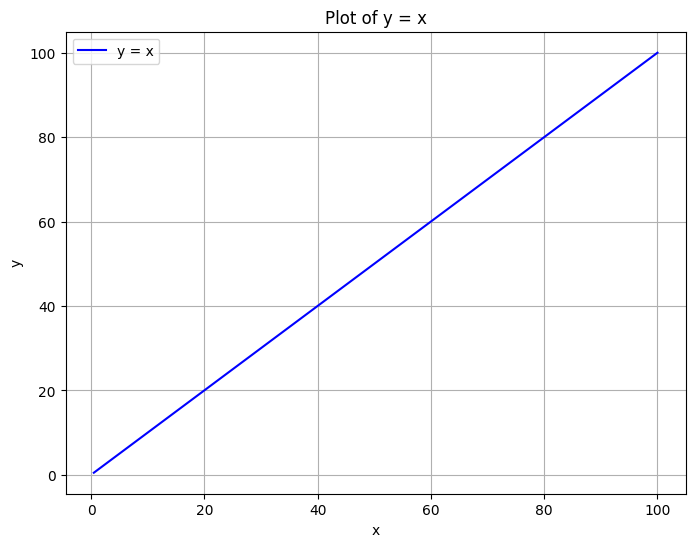

In [17]:
#y=x
x = np.arange(0.5, 100.5, 0.5)
y1 = x
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='y = x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()
plt.grid(True)
plt.show()



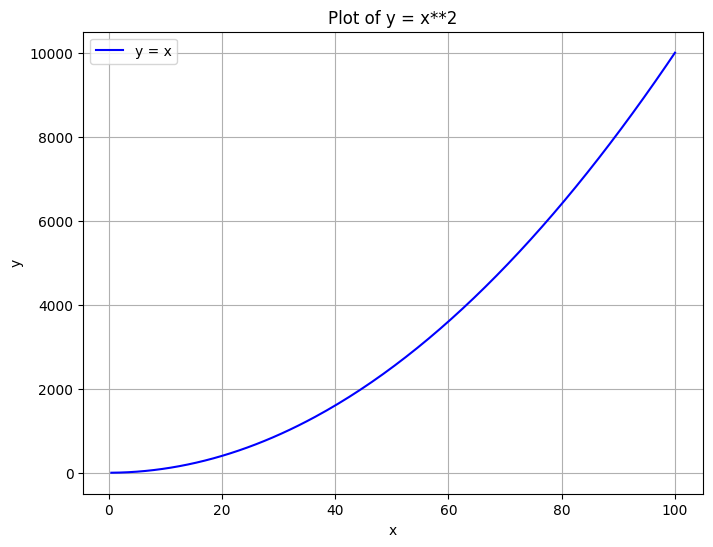

In [18]:
#y=x**2
x = np.arange(0.5, 100.5, 0.5)
y2 = x**2
plt.figure(figsize=(8, 6))
plt.plot(x, y2, label='y = x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x**2')
plt.legend()
plt.grid(True)
plt.show()


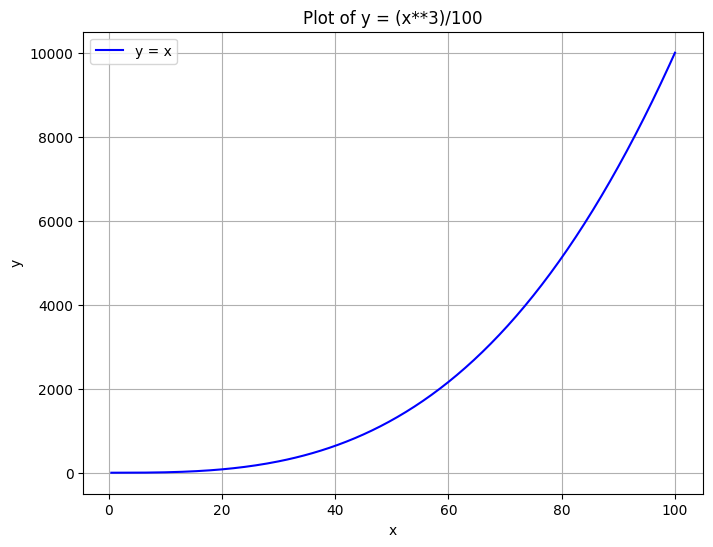

In [19]:
#y=(x**3)/100
x = np.arange(0.5, 100.5, 0.5)
y3 = (x**3)/100
plt.figure(figsize=(8, 6))
plt.plot(x, y3, label='y = x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = (x**3)/100')
plt.legend()
plt.grid(True)
plt.show()

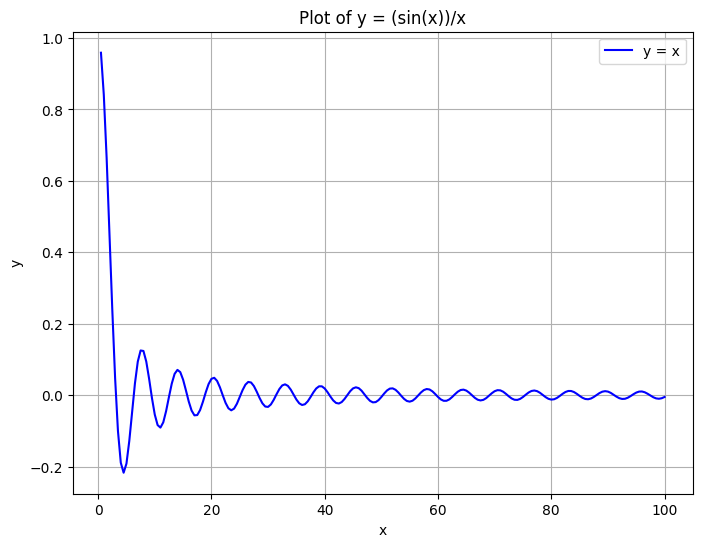

In [20]:
#y=(sin(x))/x
x = np.arange(0.5, 100.5, 0.5)
y4 = (np.sin(x))/x
plt.figure(figsize=(8, 6))
plt.plot(x, y4, label='y = x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = (sin(x))/x')
plt.legend()
plt.grid(True)
plt.show()

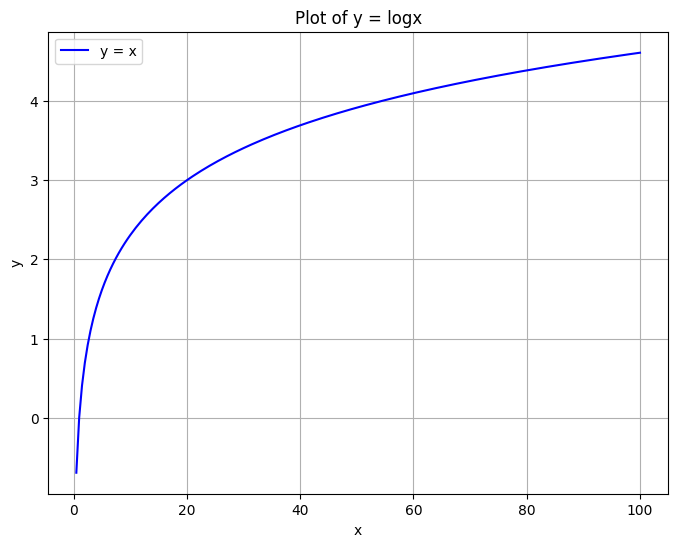

In [21]:
#y=logx
x = np.arange(0.5, 100.5, 0.5)
y5 = np.log(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y5, label='y = x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = logx')
plt.legend()
plt.grid(True)
plt.show()

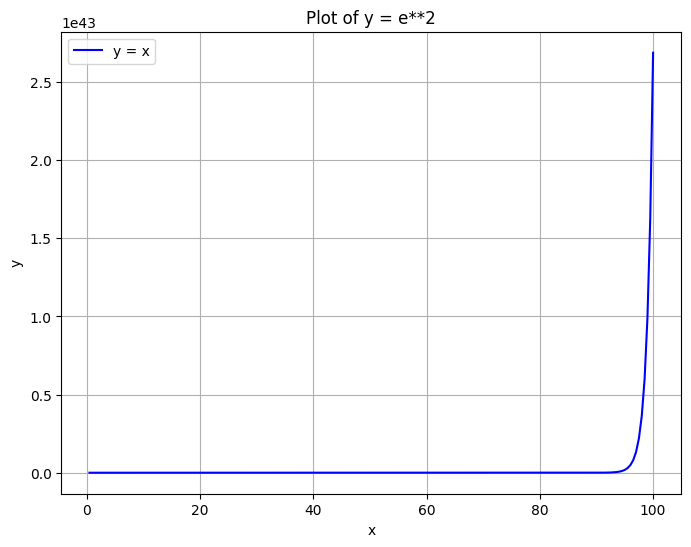

In [22]:
#y=e**x
x = np.arange(0.5, 100.5, 0.5)
y6 = np.exp(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y6, label='y = x', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e**2')
plt.legend()
plt.grid(True)
plt.show()

### Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [28]:
matrix1 = np.random.uniform(1, 2, size=(20, 5))
dataframe = pd.DataFrame(matrix1, columns = ['a', 'b', 'c', 'd', 'e'])
print(dataframe)
high_std_col = dataframe.std().idxmax()
print(f"The column with the highest standard deviation is '{high_std_col}'.")

low_mean_row = dataframe.mean(axis=1).idxmin()
print(f'The required row number with lowest mean is {low_mean_row}.')
print(f"The row with the lowest mean is:\n {dataframe.iloc[low_mean_row]}.")

           a         b         c         d         e
0   1.258087  1.241042  1.156074  1.872251  1.463687
1   1.024570  1.555526  1.945359  1.266145  1.062772
2   1.580004  1.531264  1.221480  1.770352  1.758563
3   1.635643  1.940129  1.940583  1.547562  1.471227
4   1.180210  1.193156  1.508102  1.213652  1.531038
5   1.180789  1.737582  1.980019  1.595686  1.941366
6   1.235798  1.896041  1.147351  1.304618  1.052048
7   1.618230  1.527726  1.790698  1.220413  1.838976
8   1.670562  1.968776  1.679607  1.954261  1.251882
9   1.543360  1.205420  1.992478  1.646909  1.040089
10  1.468976  1.171768  1.664726  1.606527  1.440418
11  1.034477  1.185858  1.368980  1.568728  1.632597
12  1.851831  1.320985  1.126176  1.332429  1.894354
13  1.791279  1.380621  1.401895  1.197375  1.286099
14  1.328813  1.375017  1.307443  1.928118  1.137937
15  1.865267  1.409582  1.124273  1.425751  1.849190
16  1.784891  1.402757  1.073902  1.648188  1.153773
17  1.196989  1.793975  1.350012  1.097733  1.

### Add a new coumn to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [29]:
dataframe["f"] = dataframe[["a" , "b" ,"c" ,"d" ,"e"]].sum(axis=1)
dataframe["g"] = np.where(dataframe['f'] < 8, 'LT8', 'GT8')
lt8_count = dataframe[dataframe['g'] == 'LT8'].shape[0]
lt8_std = dataframe[dataframe['g'] == "LT8"]["f"].std()
gt8_std = dataframe[dataframe['g'] == "GT8"]["f"].std()

print(dataframe)
print(f"Number of rows with 'LT8': {lt8_count}")
print(f"Standard deviation of 'f' for 'LT8': {lt8_std}")
print(f"Standard deviation of 'f' for 'GT8': {gt8_std}")

           a         b         c         d         e         f    g
0   1.258087  1.241042  1.156074  1.872251  1.463687  6.991142  LT8
1   1.024570  1.555526  1.945359  1.266145  1.062772  6.854371  LT8
2   1.580004  1.531264  1.221480  1.770352  1.758563  7.861663  LT8
3   1.635643  1.940129  1.940583  1.547562  1.471227  8.535143  GT8
4   1.180210  1.193156  1.508102  1.213652  1.531038  6.626158  LT8
5   1.180789  1.737582  1.980019  1.595686  1.941366  8.435442  GT8
6   1.235798  1.896041  1.147351  1.304618  1.052048  6.635857  LT8
7   1.618230  1.527726  1.790698  1.220413  1.838976  7.996044  LT8
8   1.670562  1.968776  1.679607  1.954261  1.251882  8.525088  GT8
9   1.543360  1.205420  1.992478  1.646909  1.040089  7.428256  LT8
10  1.468976  1.171768  1.664726  1.606527  1.440418  7.352415  LT8
11  1.034477  1.185858  1.368980  1.568728  1.632597  6.790638  LT8
12  1.851831  1.320985  1.126176  1.332429  1.894354  7.525774  LT8
13  1.791279  1.380621  1.401895  1.197375  1.28

### Write a small piece of code to explain broadcasting in numpy.


In [30]:
#Broadcasting in NumPy is used perform arithmetic operations(element-wise operations)
#on arrays of different shapes (element-wise operations). 
#When pefmorming arithmetic operations on arrays of different shapes,
#NumPy "broadcasts" the smaller array across the larger array 
#so that they have compatible shapes.

arr1 = np.array([7,8,9]) # shape (3,)
arr2 = np.array([[4],[5],[6]]) # shape (3,1)


#no. of dimensions of arr2 are morethan arr1. So arr2 is larger
#the smaller array is padded with ones on left side to match dimensions of arr2
# the size of arr1 becomes (1,3)
#now both arr1 and arr2 can broadcast to (3,3)

#BROADCASTING
#In each dimensions either sizes must match or one of them is 1.
# dimension1: arr1: 1, arr2: 3 (broadcast to max i.e. 3)
# dimension2: arr1: 3, arr2: 1 (broadcast to max i.e. 3)
# resulting shape of arr1, arr2 after reshaping is (3,3)
# now element wise operations can be performed

# [[7, 8, 9],
#  [7, 8, 9],
#  [7, 8, 9]]   # This is `a` after broadcasting

# [[4, 4, 4],
#  [5, 5, 5],
#  [6, 6, 6]]   # This is `b` after broadcasting

add = arr1+ arr2
print(add)

[[11 12 13]
 [12 13 14]
 [13 14 15]]


### Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [31]:
def argminimum(arr):
    n = arr.size
    if n == 0:
        raise ValueError("Empty Array")
        
    min_i = 0
    minimum = arr[0]
    
    for i in range(1, n):
        if arr[i] < minimum:
            minimum = arr[i]
            min_i = i
    
    return min_i

arr1 = np.array([43, 20, 7, 11, 57, 46, 89, 230, 87, 65, 172, 340, 372, 62, 12, 1, 34])
argminimum_i = argminimum(arr1)
np_i = np.argmin(arr1)

print(f"Custom function index: {argminimum_i}")
print(f"NumPy's argmin index: {np_i}")


Custom function index: 15
NumPy's argmin index: 15
